# <center><span style='color:Blue'><u>Bike Sharing Assignment</u></span></center>

# 1. Introduction

##  1.1 Business Description

- A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.
- Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it.
- This bike can then be returned to another dock belonging to the same system

## 1.2 Problem Statement

- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.
- So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
- BoomBikes **aspires to understand the demand for shared bikes among the people** after this ongoing quarantine situation ends across the nation due to Covid-19 and have planned to prepare themselves according to the people's needs.
- They want to understand **the factors on which the demand for these shared bikes depends.** Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.
- The company wants to know:
    1. Which variables are significant in predicting the demand for shared bikes.
    2. How well those variables describe the bike demands

## 1.3 Objective of the Project

- You are required to model the demand for shared bikes with the available independent variables. 
- It will be used by the management to understand how exactly the demands vary with different features.
- They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
- Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 1.4 Approach to solve this Business Problem

- Step 1 : Data Understanding and Exploratory Data Analysis ( EDA )
- Step 2 : Data Preperation
- Step 3 : Training the model over Train Data
- Step 4 : Residual Analysis
- Step 5 : Prediction and Evaluation over the Test Data
- Step 6 : Conclusions and Results 

# 2. Importing Libraries and Packages

In [1]:
import pandas as pd #Data Processing
import numpy as np #Linear Algebra
import seaborn as sns #Data Visualization
import matplotlib.pyplot as plt #Data Visualization
import warnings #Warnings
warnings.filterwarnings ("ignore") #Warnings

# 3. Data Loading

In [2]:
df_day = pd.read_csv("day.csv") #reading the CSV file as dataframe
df_day.head() #diplaying the 1st few rows of the dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 4. Data Description

In [3]:
#Finding the number of rows and columns in the data
df_day.shape

(730, 16)

##### Observations : There are 730 Rows & 16 Columns in the Dataset.

In [4]:
#Fetching the information that we can get from the dataset
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Describing the data in terms of range
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# 5. Data Understanding

##### Column wise understanding of the Data :
1.  `instant` - The unique record index of each data row
2.  `dteday` - The Date value in dd-MM-yyyy format
3.  `season` - The different seasons of the year (1 for spring, 2 for summer, 3 for fall and 4 for winter)
4.  `yr` - The Year value ( 0 for 2018 and 1 for 2019 )
5.  `mnth` - The Month value ( 1 to 12 for January to December respectively)
6.  `holiday` - The Calender Date is a Holiday or not ( 0 for Not Holiday and 1 for Holiday)
7.  `weekday` - The weekday of the week ( 0 to 6 for Sunday to Saturday respectively)
8. `workingday` : if day is neither weekend nor holiday then 1, otherwise 0.
9.  `weathersit` - The different kinds of wheather ( 1 to 4 for different weathers like good , normal , bad and very bad)
10.  `temp` - The value of temperature in Celsius
11. `atemp` - The value of feeling temperature in Celsius
12. `hum` - The value of humidity
13. `windspeed` - The value of wind speed
14. `casual` - The value of count of casual users
15. `registered` - The value of count of registered users
16. `cnt` - The count of total rental bikes including both casual and registered

# 6. Data Cleaning/Validation and Manipulation

## 6.1 Checking Duplicate Rows

In [6]:
# By default, for each set of duplicated values, the first occurrence is set on False and all others are True.
print("The total number of Duplicate Rows are" , df_day.duplicated().sum())

The total number of Duplicate Rows are 0


##### Observations : There are No Duplicate rows in the Dataset.

## 6.2 Checking the Rows and Columns for NULL values

In [7]:
#Find the count of Rows and Columns having all data as NULL
print("The number of missing Rows are" , df_day.isnull().all(axis=1).sum())
print("The number of missing Columns are" , df_day.isnull().all(axis=0).sum())

The number of missing Rows are 0
The number of missing Columns are 0


In [8]:
#Percentage of NUll Values in the Dataset
100*df_day.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

##### Observations : There are No Missing values in the Dataset.

## 6.3 Dropping irrelevent Columns

1. `instant` - Since this the index of each row and cannot be used for predicting the demand for shared bikes.
2. `dteday` - Since we already have the columns for month and year also that this individual column cannot be used for predicting the demand for shared bikes
3. `casual` - Since this is a part of target variable ( cnt included both casual and registered ) so cannot be used for predicting the demand for shared bikes. Also this column will have a strong corelation with the target variable
4. `registered` - Since this is a part of target variable ( cnt included both casual and registered ) so cannot be used for predicting the demand for shared bikes. Also this column will have a strong corelation with the target variable

In [9]:
#Adding the above mentioned columns in a list
irr_col = ['instant','dteday','casual','registered']
df_day.drop(labels = irr_col, axis = 1, inplace=True) #Dropping the columns added in the list
print("The new size of the data is" , df_day.shape) #Printing the new Dataset Shape

The new size of the data is (730, 12)


## 6.4 Rounding off the columns to 2 decimal places

In [10]:
df_day = df_day.round(decimals = 2)

## 6.5 Checking the unique data of each Column

In [11]:
for i in df_day.columns :
    print(i,"\n")
    print(df_day[i].value_counts(),"\n")
    print("****************************************")

season 

3    188
2    184
1    180
4    178
Name: season, dtype: int64 

****************************************
yr 

0    365
1    365
Name: yr, dtype: int64 

****************************************
mnth 

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 

****************************************
holiday 

0    709
1     21
Name: holiday, dtype: int64 

****************************************
weekday 

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 

****************************************
workingday 

1    499
0    231
Name: workingday, dtype: int64 

****************************************
weathersit 

1    463
2    246
3     21
Name: weathersit, dtype: int64 

****************************************
temp 

10.90    5
26.04    5
27.88    4
17.94    4
14.08    4
        ..
25.99    1
27.44    1
26.38    1
28.99    1
8.85     1
Name: temp, Length: 489

##### Observations : All the Columns have correct data format as well as datatype

In [12]:
#Inspect the data after cleaning and validations
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


# 7. Exploratory Data Analysis ( EDA )

## 7.1 Univariate Analysis of the Catagorical columns

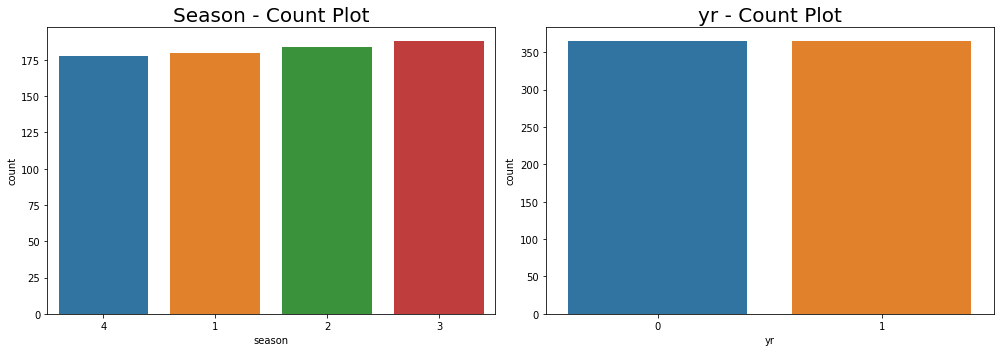

In [13]:
# Univariate Analysis using Count Plot of the columns- Season and yr
plt.figure(figsize=(14,5))#The size of the plot

plt.subplot(1,2,1)#Subplot to show to 2 plots together
sns.countplot(df_day['season'],order=df_day['season'].value_counts().sort_values().index) 
plt.title("Season - Count Plot",fontsize=20)#The title of the plot

plt.subplot(1,2,2)
sns.countplot(df_day['yr'],order=df_day['yr'].value_counts().sort_values().index)
plt.title("yr - Count Plot",fontsize=20)#The title of the plot

plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

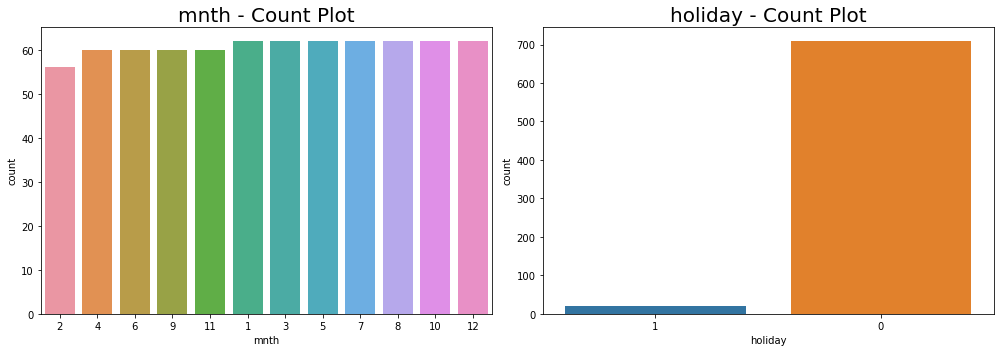

In [14]:
# Univariate Analysis using Count Plot of the columns - mnth and holiday
plt.figure(figsize=(14,5))#The size of the plot

plt.subplot(1,2,1)#Subplot to show to 2 plots together
sns.countplot(df_day['mnth'],order=df_day['mnth'].value_counts().sort_values().index)
plt.title("mnth - Count Plot",fontsize=20)#The title of the plot

plt.subplot(1,2,2)
sns.countplot(df_day['holiday'],order=df_day['holiday'].value_counts().sort_values().index)
plt.title("holiday - Count Plot",fontsize=20)#The title of the plot

plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

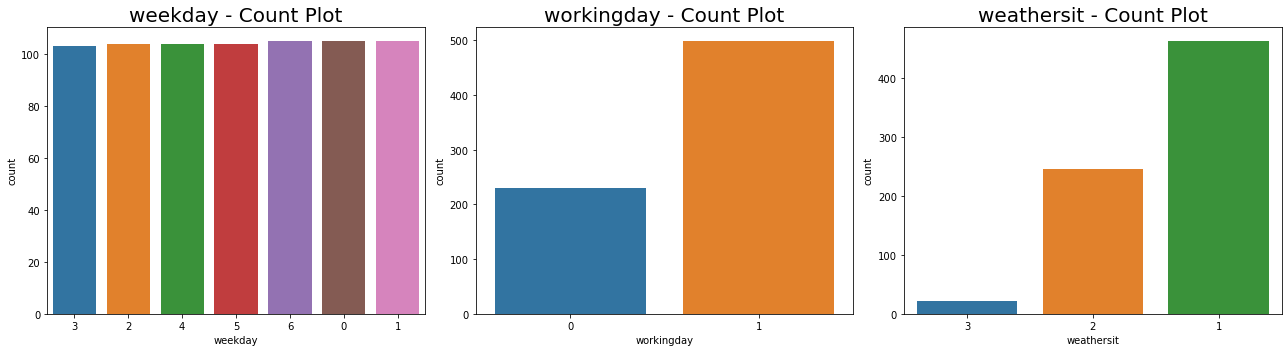

In [15]:
# Univariate Analysis using Count Plot of the columns - weekday, workingday and weathersit
plt.figure(figsize=(18,5))#The size of the plot

plt.subplot(1,3,1)#Subplot to show to 3 plots together
sns.countplot(df_day['weekday'],order=df_day['weekday'].value_counts().sort_values().index)
plt.title("weekday - Count Plot",fontsize=20)#The title of the plot

plt.subplot(1,3,2)
sns.countplot(df_day['workingday'],order=df_day['workingday'].value_counts().sort_values().index)
plt.title("workingday - Count Plot",fontsize=20)#The title of the plot

plt.subplot(1,3,3)
sns.countplot(df_day['weathersit'],order=df_day['weathersit'].value_counts().sort_values().index)
plt.title("weathersit - Count Plot",fontsize=20)#The title of the plot

plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

##### Observations:
1. **season** - All the 4 seasons are almost equally distributed data
2. **yr** - Data is equally distributed for both the years 2018 and 2019
3. **mnth** - Data is equally distributed for all the months of a year
4. **holiday** - Number of holidays are very few compared to non-holidays and this is expected
5. **weekday** - Data is equally distributed for all the days of a week
6. **workingday** - Around 500 days of the year are working days whereas around 250 days of the year are either weekend/holiday
7. **weathersit** - Most of the days has a normal wheather (1) whereas there had never been a very bad wheather(4)

## 7.2 Univariate Analysis of the Continous columns

## 7.2.1 temp

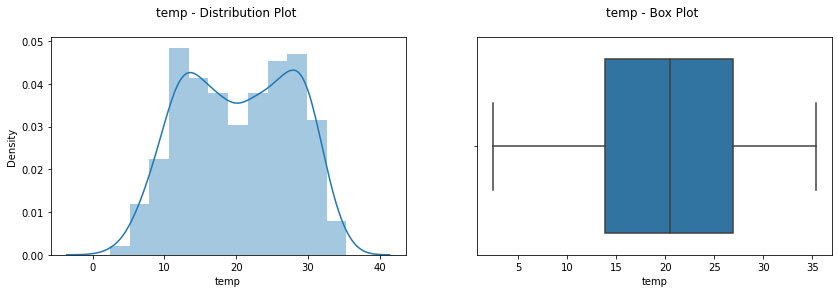

In [16]:
#Univariate Analysis on temp column using Distribution and box plot (to check the outliers)
fig = plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.title("temp - Distribution Plot \n")
sns.distplot(df_day["temp"])

plt.subplot(1,2,2)
plt.title("temp - Box Plot \n")
sns.boxplot(df_day["temp"])

plt.show()

## 7.2.2 atemp

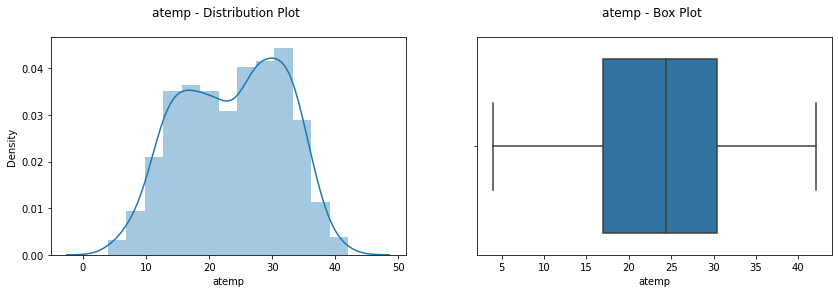

In [17]:
#Univariate Analysis on temp column using Distribution and box plot (to check the outliers)
fig = plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.title("atemp - Distribution Plot \n")
sns.distplot(df_day["atemp"])

plt.subplot(1,2,2)
plt.title("atemp - Box Plot \n")
sns.boxplot(df_day["atemp"])

plt.show()

## 7.2.3 hum

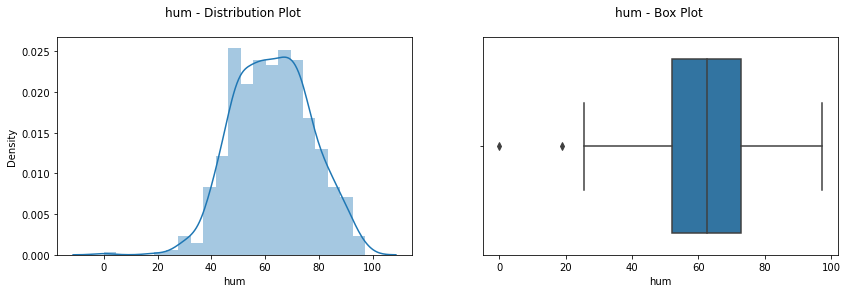

In [18]:
#Univariate Analysis on temp column using Distribution and box plot (to check the outliers)
fig = plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.title("hum - Distribution Plot \n")
sns.distplot(df_day["hum"])

plt.subplot(1,2,2)
plt.title("hum - Box Plot \n")
sns.boxplot(df_day["hum"])

plt.show()

## 7.2.4 windspeed

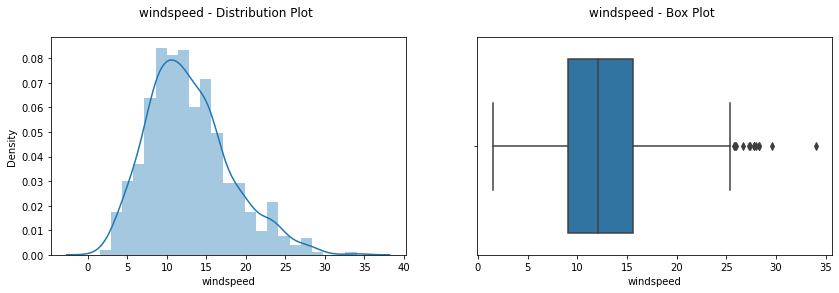

In [19]:
#Univariate Analysis on temp column using Distribution and box plot (to check the outliers)
fig = plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.title("windspeed - Distribution Plot \n")
sns.distplot(df_day["windspeed"])

plt.subplot(1,2,2)
plt.title("windspeed - Box Plot \n")
sns.boxplot(df_day["windspeed"])

plt.show()

## 7.2.5 cnt

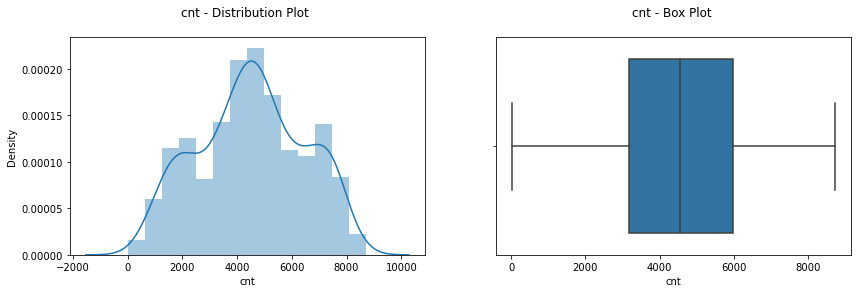

In [20]:
#Univariate Analysis on temp column using Distribution and box plot (to check the outliers)
fig = plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.title("cnt - Distribution Plot \n")
sns.distplot(df_day["cnt"])

plt.subplot(1,2,2)
plt.title("cnt - Box Plot \n")
sns.boxplot(df_day["cnt"])

plt.show()

##### Observations:
1. **`temp`** and  **atemp** - Most of the days has a temperate and feeling temperature between 15 to 30 degree Celsius 
2. **`hum`** - The humidity varies between 50 to 70 for most of the days
3. **`windspeed`** - The windspeed varies between 10 to 15 for most of the days
4. **`cnt`** - The count of total rental bikes varies between 3500 to 6000 count of total rental bikes.
#### Here we can see Outliers in some of the variables but we will not drop them since this may lead to data loss , the outliers will be treated during min-max ( normalisation ) scaling

## 7.2 Bivariate Analysis of the Categorical columns

#### Here the Target Variable is cnt ( count of total rental bikes ) and will be compared with other variables
#### Here we will use Box Plot to analyze the relationship between Target variable and other Categorical variables

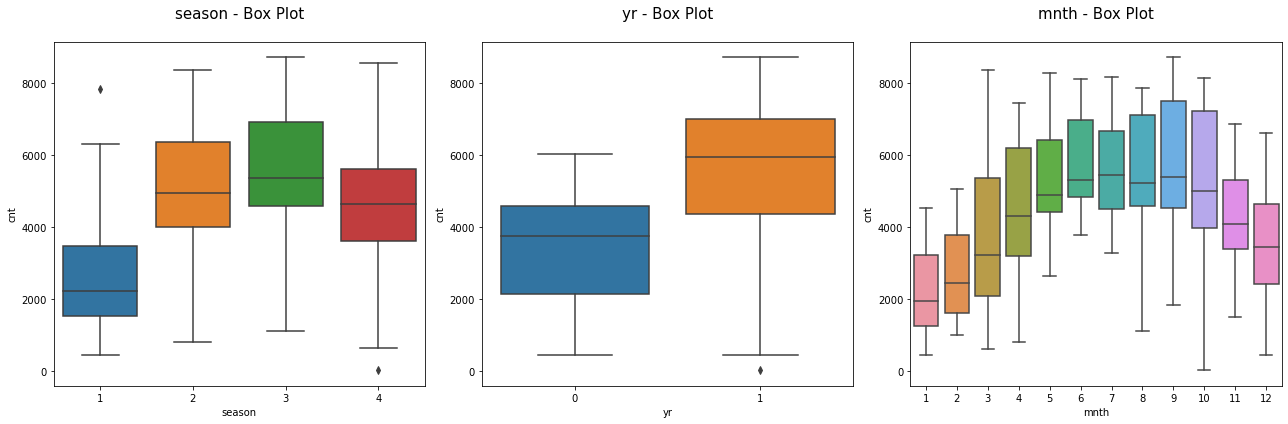

In [21]:
#Bivariate analysis of the catagorical columns season, yr and mnth with respect to the target column using Box Plot
fig = plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_day)
plt.title("season - Box Plot\n",fontsize=15)#The title of the plot

plt.subplot(1,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_day)
plt.title("yr - Box Plot\n",fontsize=15)#The title of the plot

plt.subplot(1,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_day)
plt.title("mnth - Box Plot\n",fontsize=15)#The title of the plot

plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

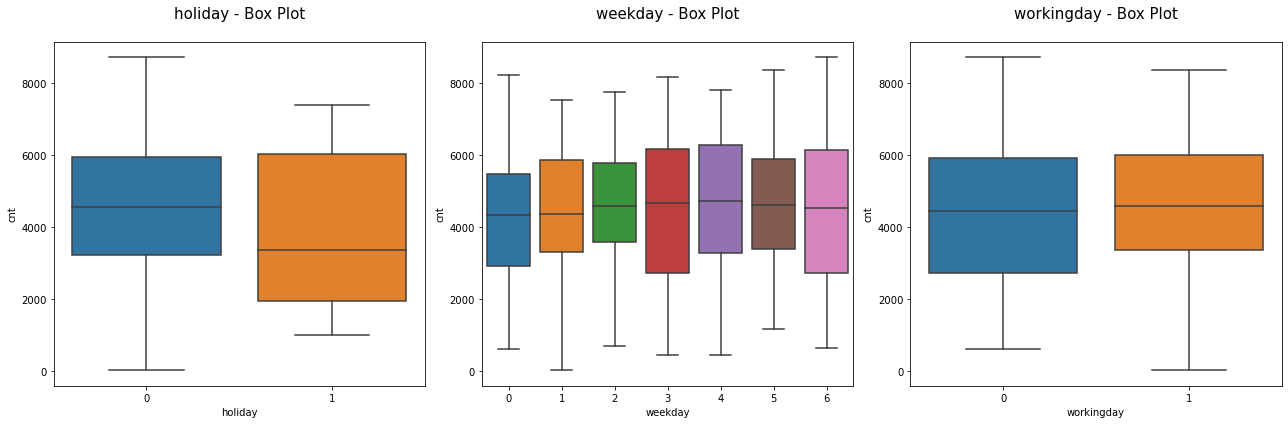

In [22]:
#Bivariate analysis of the catagorical columns holiday, weekday and workingday with respect to the target column using Box Plot
fig = plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_day)
plt.title("holiday - Box Plot\n",fontsize=15)#The title of the plot

plt.subplot(1,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_day)
plt.title("weekday - Box Plot\n",fontsize=15)#The title of the plot

plt.subplot(1,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_day)
plt.title("workingday - Box Plot\n",fontsize=15)#The title of the plot

plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

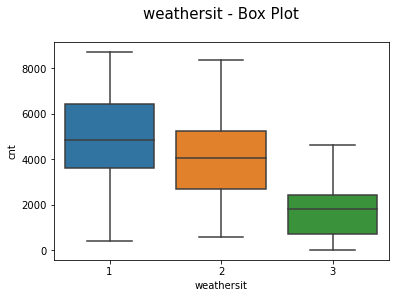

In [23]:
#Bivariate analysis of the catagorical column weathersit with respect to the target column using Box Plot
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_day)
plt.title("weathersit - Box Plot\n",fontsize=15)#The title of the plot

plt.show()#to display the plot

##### Observations:
1. **`season`** - . Most of the bikes were booked in the 2nd and 3rd season and the 1st season has very few number of bookings, this shows that season could be a driving factor behind the number of bookings
2. **`yr`** -  2019 has more number of bookings compared to 2018 , this shows that yr could be a driving factor behind the number of bookings
3. **`mnth`** -  There is a trend in the numbers of bookings with respect to the month. From January till July the bookings keeps on increasing month on month and from July to December the bookings keeps on decresing month on month.
4. **`holiday`** - There were more number of bookings in the non holidays as compared to the holidays, this shows that holiday could be a driving factor behind the number of bookings 
5. **`weekday`** - All the days of the week have almost equal number of bookings , this shows that weekday could be a driving factor behind the number of bookings
6. **`workingday`** - There is not much difference between the medians of workingdays (1) and non workingdays (0), this shows that workingdays could not be a driving factor behind the number of bookings
7. **`weathersit`** - Maximum number of booking are done when the weather was either very good or normal, this shows that weathersit could be a driving factor behind the number of bookings

## 7.3 Bivariate Analysis of the Continous columns

#### Here we will use Pair Plot to analuze the relationship between Target variable and other Continous variables

<Figure size 1440x864 with 0 Axes>

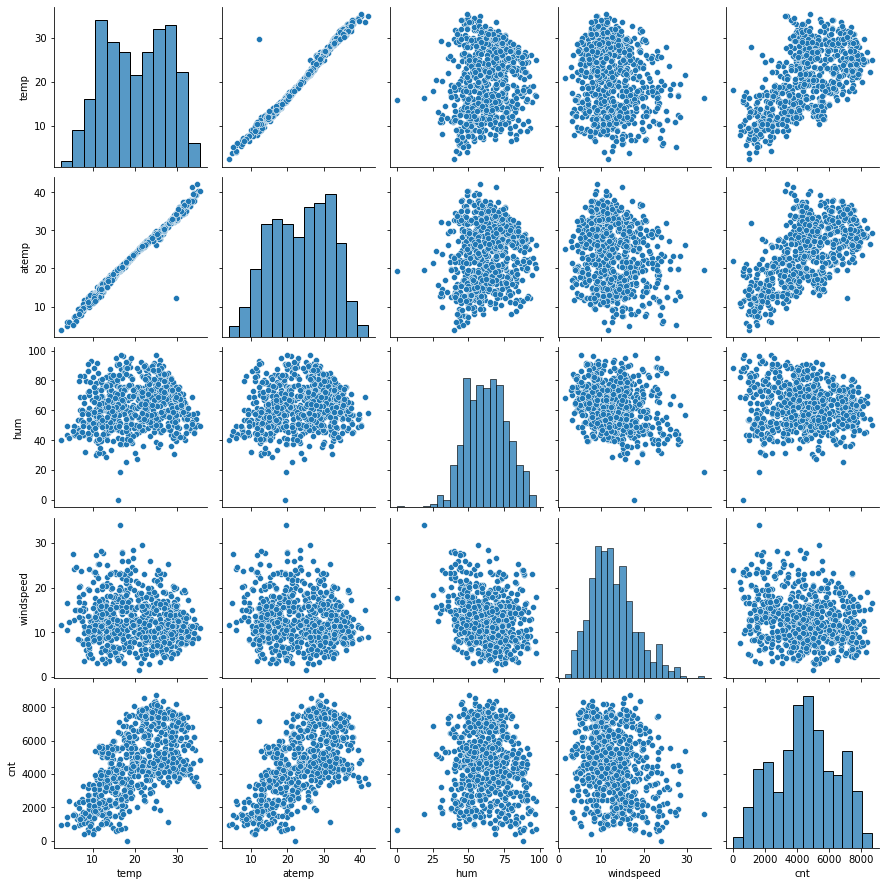

In [24]:
con_cols = ['temp','atemp','hum','windspeed',"cnt"]#listing all the Continous columns together
plt.figure(figsize = (20, 12))
sns.pairplot(df_day, vars= con_cols)
plt.show()

##### Observations:
1. **`temp`** - There is a strong positive linear relationship between temp and number of bookings and thus it could be a driving factor behind the number of bookings 
2. **`atemp`** - There is a strong positive linear relationship between atemp and number of bookings and thus it could be a driving factor behind the number of bookings
3. **`hum`** - There is a not strong but positive linear relationship between humidity and number of bookings and thus it could be a driving factor behind the number of bookings
4. **`windspeed`** - There is a not strong but positive linear relationship between windspeed and number of bookings and thus it could be a driving factor behind the number of bookings.
5. We can also observe a very very strong positive linear relationship between temp and atemp , this shows that both the variables could be highly correlated with each other.

### 7.4 Multivariate Analysis of the all columns using Heat Map

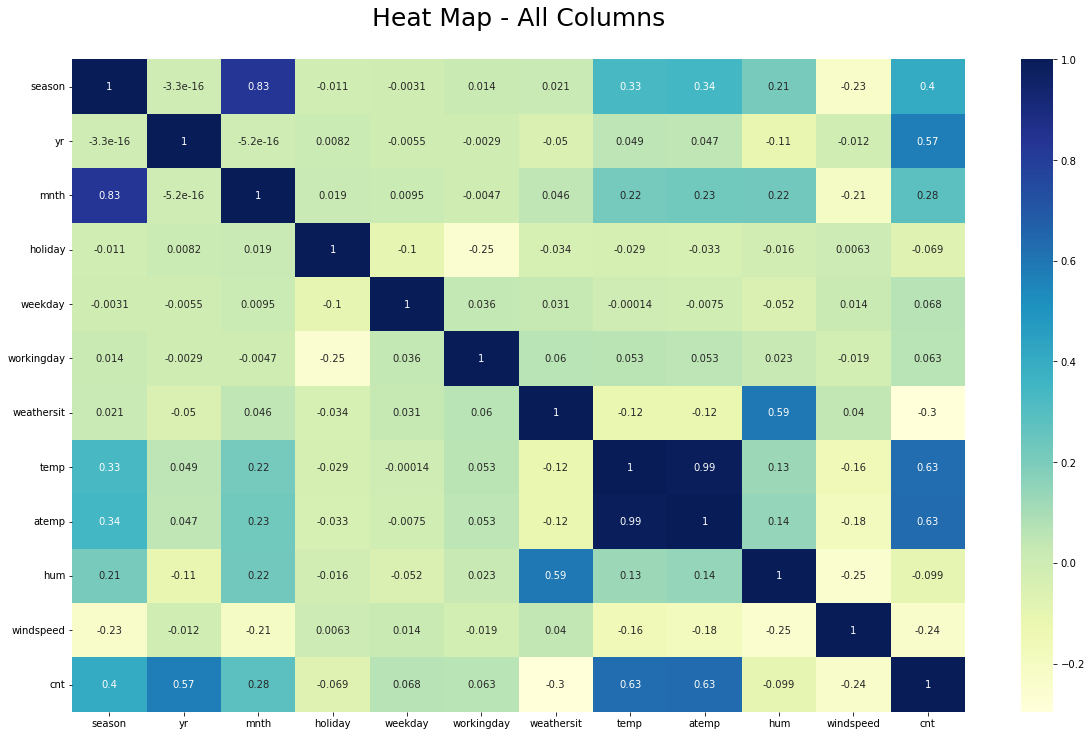

In [25]:
plt.figure(figsize = (20, 12))
sns.heatmap(df_day.corr(),cmap="YlGnBu",annot=True)
plt.title("Heat Map - All Columns\n",fontsize=25)#The title of the plot
plt.show()

##### Observations:
1. **`temp and atemp`** - There is a strong correlation of 0.99 between the columns temp and atemp and this may lead to multicollinearity
2. **`season and month`** - There is a strong correlation of 0.83 between the columns season and month
**Since these pairs have high correlation , we have to drop any 1 during model preparation with the help of p-value and VIF** 

# 7. Data Preparation for Modelling

Data preparation has 3 main steps :
1. Encoding on Catagorical Columns ( Converting the to either 0/1 or Dummy Variables)
3. Dividing the data in terms of Train and Test
2. Scaling on the Continous variables of Train data

## 7.1 Creating Dummy Variables for Categorical Columns

We will perform **Encoding on Catagorical Columns** by basically 2 ways :
1. Converting Binary Categorical Columns to **0 and 1**.
2. Converting Other Categorical Columns to **Dummy Variables**.

**Note** : We do not need to perform the 1st step since all the Binary Categorical Columns (yr, holiday & workingday) are already available in the form of 0 and 1.

There are 4 categorical variables (**season, mnth, weekday and weathersit**) that are other than binary , since the datatype of these variables are integer so we to convert them to Catagorical Columns


In [26]:
#Changing the datatype to 'category'
df_day['season']=df_day['season'].astype('category')
df_day['mnth']=df_day['mnth'].astype('category')
df_day['weekday']=df_day['weekday'].astype('category')
df_day['weathersit']=df_day['weathersit'].astype('category')
df_day.info()#displaying the Datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


- We will create Dummy Variables using **`get_dummies`** function
- We will use the parameter **`drop_first`** as True to drop the 1st dummy variable of each categorical column to increases the efficiency of the model
- We will use the orginal dataset so that the orginal categorical column gets removed wgich again increases the efficiency of the model

In [27]:
df_day = pd.get_dummies(df_day,drop_first=True)
df_day.info()#displaying the updated Datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [28]:
#Lets check the updated Dataset
df_day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.11,18.18,80.58,10.75,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.90,17.69,69.61,16.65,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.05,9.47,43.73,16.64,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
#Lets check the updated Dataset in terms of percentile
df_day.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319329,23.726384,62.765082,12.763699,4508.006849,0.252055,0.257534,...,0.082192,0.084932,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836,0.336986,0.028767
std,0.500343,0.167266,0.465405,7.506827,8.150247,14.237634,5.195640,1936.011647,0.434490,0.437576,...,0.274845,0.278971,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164,0.473004,0.167266
min,0.000000,0.000000,0.000000,2.420000,3.950000,0.000000,1.500000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.810000,16.892500,52.000000,9.040000,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465000,24.370000,62.625000,12.130000,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.882500,30.445000,72.990000,15.627500,5966.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.330000,42.040000,97.250000,34.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#Lets check the updated number of rows and columns in the data
df_day.shape

(730, 30)

##### Observations : There are 730 Rows & 30 Columns in the Dataset.

## 7.2 Dividing the Data in terms of TRAIN and TEST

### To perform all these actions related to modeling we have to use `sklearn` and `stats model` libraries

In [31]:
import sklearn
from sklearn.model_selection import train_test_split #for spliting the data in terms of train and test
from sklearn.preprocessing import MinMaxScaler #for performing minmax scaling on the continous variables of training data
from sklearn.feature_selection import RFE #for performing automated Feature Selection
from sklearn.linear_model import LinearRegression #to build linear model
from sklearn.metrics import r2_score #for calculating the r-square value
import statsmodels.api as sm #for add the constant value
from statsmodels.stats.outliers_influence import variance_inflation_factor #to calculate the VIF

In [32]:
#Here we will keep the train size as 70% and automatically test size will be rest 30%
#Also we will keep random_state as a fixed value of 100 so that the data set does no changes
df_train,df_test = train_test_split(df_day, train_size = 0.7, random_state = 100)
print ("The Size of Train data is",df_train.shape)
print ("The Size of Test data is",df_test.shape)

The Size of Train data is (510, 30)
The Size of Test data is (220, 30)


##### Note : Now from here onwards we will work on the `Train Data` ( df_train )  to build the model and at the end we will use `Test data` ( df_test) to evaluate our model

## 7.3 Scaling of Features

- We perform scaling to bring the all variables to same scale , also scaling helps in optimisation of the model
- Scaling are basically 2 types, min-max (normalisation) and standardisation
- Here we will perform **Min-max Scaling on Continous Columns** ( temp, atemp, hum and windspeed )
- This is because min-max scaling also **handles the outliers** of the variables and keep all values between 0 and 1
- Here we will use **fit_transform** on the training data.
- fit_transform is used on the training data so that we can **scale the training data** as well as **learn the scaling parameters.**

In [33]:
Scaler = MinMaxScaler() # Instantiate an object
num_cols = ['atemp', 'hum','temp','windspeed','cnt'] #listing all the Continous Variables together
#Note-The above order of columns in num_cols should be same in df_test also otherwise we will get a wrong r-square value
df_train[num_cols] = Scaler.fit_transform(df_train[num_cols])

In [34]:
#Inspect the data in percentile after min-max Scaling
df_train[num_cols].describe()

,atemp,hum,temp,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513266,0.650490,0.537477,0.320981,0.513499
std,0.212417,0.145849,0.225814,0.169776,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.332174,0.538644,0.339866,0.199230,0.356420
50%,0.529929,0.653751,0.542692,0.296760,0.518638
75%,0.688632,0.754818,0.735339,0.414501,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


##### Observations :  All the continous variables are successfully scaled where the max value is 1 and min value is 0

# 8. Training the Model

- To train a model we need to perform **Feature Selection** which are basically done by 3 ways :
    1. Manual Selection where each variable is selected 1 by 1.
    2. Manual Elimination where each variable is eliminated 1 by 1.
    3. Automated Process ( RFE )


- RFE or **Recursive Feature Elimination** is an automated approach of feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.


- Here we will use a **Balanced Approach** which is a combination of both automation (RFE) and manual (Elimination)

In [35]:
#Define X_train and y_train
y_train = df_train.pop('cnt') #This contains only the Target Variable
X_train = df_train #This contains all the Independent Variables except the Target Variable
#Since 'cnt' is the target variable we will keep it only on y-train and remove it from X_train

In [36]:
#Inspecting the X_train data set
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   season_2      510 non-null    uint8  
 8   season_3      510 non-null    uint8  
 9   season_4      510 non-null    uint8  
 10  mnth_2        510 non-null    uint8  
 11  mnth_3        510 non-null    uint8  
 12  mnth_4        510 non-null    uint8  
 13  mnth_5        510 non-null    uint8  
 14  mnth_6        510 non-null    uint8  
 15  mnth_7        510 non-null    uint8  
 16  mnth_8        510 non-null    uint8  
 17  mnth_9        510 non-null    uint8  
 18  mnth_10       510 non-null  

In [37]:
#Inspecting the y_train data set
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 510 entries, 576 to 520
Series name: cnt
Non-Null Count  Dtype  
--------------  -----  
510 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


## Model 1 - Automated Process using RFE

In [38]:
#Fit the Model
lr = LinearRegression()

In [39]:
#Since we have 29 columns in the X_train, lets select only half of it , say 14 using RFE
rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [40]:
#View the support_ and rank_ 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 7),
 ('season_4', True, 1),
 ('mnth_2', False, 14),
 ('mnth_3', False, 8),
 ('mnth_4', False, 11),
 ('mnth_5', False, 9),
 ('mnth_6', False, 10),
 ('mnth_7', False, 15),
 ('mnth_8', False, 3),
 ('mnth_9', True, 1),
 ('mnth_10', False, 5),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 4),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

##### Observations :  
- Here **True, 1** means the feature is selected by RFE 
- Rest all are not selected by RFE

In [41]:
#List of columns selected by RFE
Rfe_Cols = X_train.columns[rfe.support_]
Rfe_Cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [42]:
#List of columns NOT selected by RFE
Rfe_not_Cols = X_train.columns[~rfe.support_]
Rfe_not_Cols

Index(['atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

In [43]:
#Creating X_train using RFE selected variables
#We are using the function of statsmodels here
X_train_rfe = X_train[Rfe_Cols] #X_train_rfe will now have all the RFE selected features
X_train_rfe = sm.add_constant(X_train_rfe) # adding the constant c to the variables to form the equation y = mx + c
X_train_rfe.shape

(510, 16)

In [44]:
#Running the Model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [45]:
#Stats summary of the model 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.99e-181
Time:                        09:45:33   Log-Likelihood:                 492.88
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2572      0.027      9.541   

In [46]:
#Listing VIF of all columns
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns #Column Names
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2) #Rounding to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
10,weekday_1,inf
11,weekday_2,inf
12,weekday_3,inf
13,weekday_4,inf
14,weekday_5,inf
0,const,42.46
5,hum,1.26
8,season_4,1.25


## Model 2 - Manual Elimination of column - `'weekday_5'`

In [47]:
#Removing the variable 'weekday_5' based on its High p-value & High VIF
X_train_new = X_train_rfe.drop(["weekday_5"], axis = 1)

In [48]:
#Listing VIF of all columns
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns #Column Names
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2) #Rounding to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

,Features,VIF
0,const,42.46
3,workingday,2.47
10,weekday_1,1.94
12,weekday_3,1.91
13,weekday_4,1.79
11,weekday_2,1.77
2,holiday,1.35
5,hum,1.26
8,season_4,1.25
4,temp,1.21


In [49]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)
# Create a Second fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
#Stats summary of the model 
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.99e-181
Time:                        09:45:34   Log-Likelihood:                 492.88
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     495   BIC:                            -892.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2572      0.027      9.541   

## Model 3 - Manual Elimination of column - `'weekday_3'`

In [50]:
#Removing the variable 'weekday_3' based on its High p-value
X_train_new = X_train_new.drop(["weekday_3"], axis = 1)

In [51]:
#Listing VIF of all columns
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns #Column Names
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2) #Rounding to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

,Features,VIF
0,const,42.45
3,workingday,1.51
10,weekday_1,1.39
12,weekday_4,1.28
11,weekday_2,1.27
5,hum,1.26
2,holiday,1.25
8,season_4,1.25
4,temp,1.21
7,season_2,1.19


In [52]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)
# Create a Third fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
#Stats summary of the model 
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     188.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.58e-182
Time:                        09:45:34   Log-Likelihood:                 492.88
No. Observations:                 510   AIC:                            -957.8
Df Residuals:                     496   BIC:                            -898.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2573      0.027      9.553   

## Model 4 - Manual Elimination of column - `'weekday_4'`

In [53]:
#Removing the variable 'weekday_4' based on its High VIF
X_train_new = X_train_new.drop(["weekday_4"], axis = 1)

In [54]:
#Listing VIF of all columns
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns #Column Names
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2) #Rounding to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

,Features,VIF
0,const,42.39
3,workingday,1.27
5,hum,1.25
8,season_4,1.25
10,weekday_1,1.24
2,holiday,1.21
4,temp,1.21
7,season_2,1.19
6,windspeed,1.16
11,weekday_2,1.15


In [55]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)
# Create a Third fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
#Stats summary of the model 
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.52e-183
Time:                        09:45:34   Log-Likelihood:                 492.85
No. Observations:                 510   AIC:                            -959.7
Df Residuals:                     497   BIC:                            -904.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2570      0.027      9.560   

## Model 5 - Manual Elimination of column - `'weekday_2'`

In [56]:
#Removing the variable 'weekday_2' based on its High p-value & High VIF
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)

In [57]:
#Listing VIF of all columns
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns #Column Names
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2) #Rounding to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

,Features,VIF
0,const,42.34
5,hum,1.25
8,season_4,1.25
4,temp,1.21
2,holiday,1.20
7,season_2,1.19
10,weekday_1,1.17
6,windspeed,1.16
3,workingday,1.14
9,mnth_9,1.11


In [58]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)
# Create a Third fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
#Stats summary of the model 
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.52e-184
Time:                        09:45:34   Log-Likelihood:                 492.42
No. Observations:                 510   AIC:                            -960.8
Df Residuals:                     498   BIC:                            -910.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2579      0.027      9.599   

## Model 6 - Manual Elimination of column - `'weekday_1'`

In [59]:
#Removing the variable 'weekday_1' based on its High p-value & High VIF
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)

In [60]:
#Listing VIF of all columns
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns #Column Names
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2) #Rounding to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

,Features,VIF
0,const,42.30
5,hum,1.25
8,season_4,1.25
4,temp,1.21
7,season_2,1.19
6,windspeed,1.16
9,mnth_9,1.11
10,weathersit_3,1.11
2,holiday,1.07
3,workingday,1.07


In [61]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)
# Create a Third fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
#Stats summary of the model 
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     245.1
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.23e-185
Time:                        09:45:34   Log-Likelihood:                 492.05
No. Observations:                 510   AIC:                            -962.1
Df Residuals:                     499   BIC:                            -915.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2585      0.027      9.630   

## Model 7 - Manual Elimination of column - `'workingday'`

In [62]:
X_train_new.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_2', 'season_4', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [63]:
#Removing the variable 'weekday_1' based on its High p-value & High VIF
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [64]:
#Listing VIF of all columns
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns #Column Names
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])] #VIF value
vif['VIF'] = round(vif['VIF'], 2) #Rounding to 2 decimal places
vif = vif.sort_values(by = "VIF", ascending = False) #arranging in decending order
vif

,Features,VIF
0,const,40.20
4,hum,1.25
7,season_4,1.24
3,temp,1.21
6,season_2,1.19
5,windspeed,1.16
8,mnth_9,1.11
9,weathersit_3,1.11
1,yr,1.02
2,holiday,1.01


In [65]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)
# Create a Third fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()
#Stats summary of the model 
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.81e-186
Time:                        09:45:34   Log-Likelihood:                 490.72
No. Observations:                 510   AIC:                            -961.4
Df Residuals:                     500   BIC:                            -919.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2682      0.026     10.232   

##### Observations :
- All the Features have 0 or almost 0 p - value which means there are **no significant variables in the model**.
- All the Features have VIF between 1 to 1.5 which is considered as a **very Good VIF and thus there is no multicollinearity between the independent variables** as all the values are below 5
- The R-squared value is **`0.83 or 83%`** which shows that **how well the regression model explains the observed data**.
- The Adjusted R-squared value is 0.827 or 82.7% which shows that **how additional input variables are adding value to the model.**
- Difference between R-squared and Adjusted R-squared values is very less, which shows that **there are no additional parameters that can be removed from this model.**
- The Prob (F-statistic) is less than 0.05 which shows that the **model is fit significantly.**


## 9. Residual Analysis and Assumtions

In [66]:
y_train_pred = lr7.predict(X_train_lm7) #prediction on the final training data
y_train_pred

576    0.722508
426    0.527150
728    0.366810
482    0.639912
111    0.275489
         ...   
578    0.779867
53     0.244282
350    0.310030
79     0.312323
520    0.690873
Length: 510, dtype: float64

In [67]:
errors = y_train - y_train_pred #errors are the difference between actual value and the predicted value

### In Residual Analysis we will validate the Assumtions of regression by following ways :

### 9.1. The errors terms should be Normally Distributed with the mean at 0

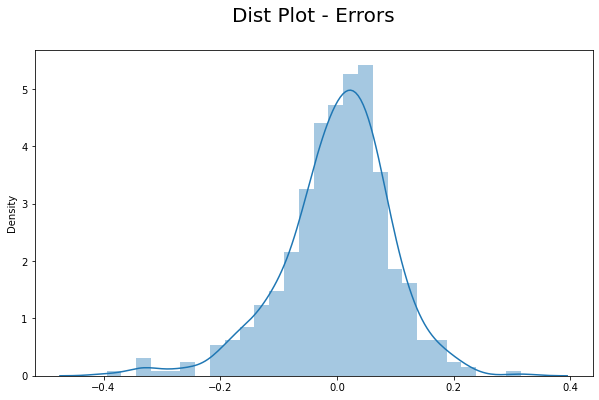

In [68]:
fig = plt.figure(figsize=(10,6))
sns.distplot(errors) #Dist plot to check the Normal Distributed of the error terms
plt.title("Dist Plot - Errors\n",fontsize=20)
plt.show()

In [132]:
#Lets verify the data in numericals terms
errors.mean()

-7.630062159433673e-16

##### Observation : 
- Thus it is proved that the errors terms are Normally Distributed with the mean at 0
- When checked in numerical terms the mean is equivalent to 0

### 9.2 The errors terms should be Independent of each other

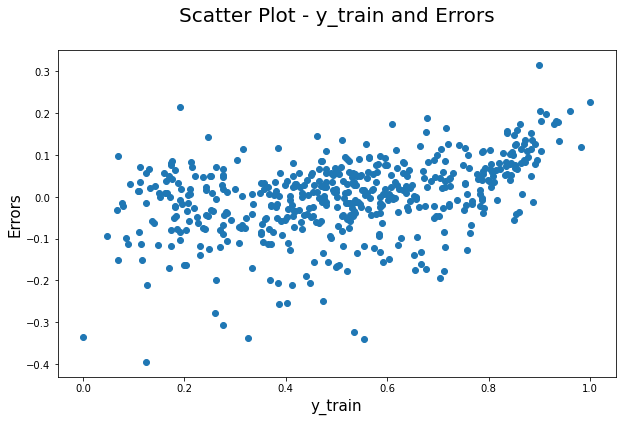

In [107]:
fig = plt.figure(figsize=(10,6))
plt.scatter(y_train,errors) #Using Scatter plot we will check the relation between y_train and error
plt.title("Scatter Plot - y_train and Errors\n",fontsize=20)
plt.ylabel("Errors",fontsize=15)
plt.xlabel("y_train",fontsize=15)
plt.show()

##### Observation :  
- There is no pattern formed  between y_train and errors.
- The points are scattered around y = 0
- Thus it is proved that the errors terms should be Independent of each other

### 9.3 The errors terms have a constant varience (Homoscedasticity)

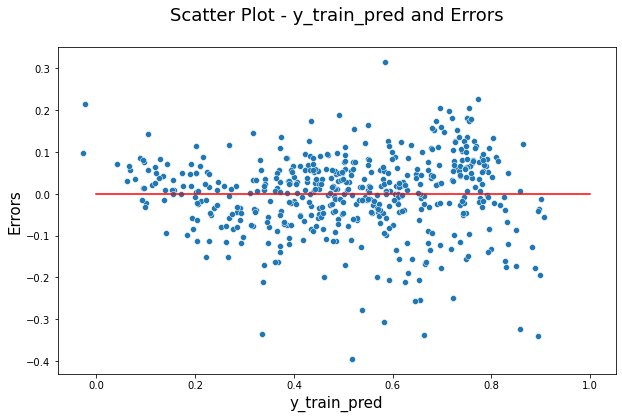

In [130]:
fig = plt.figure(figsize=(10,6))
p = sns.scatterplot(y_train_pred,errors)
p = sns.lineplot([0,1],[0,0],color='red')
plt.title("Scatter Plot - y_train_pred and Errors\n",fontsize=18)
plt.ylabel("Errors",fontsize=15)
plt.xlabel("y_train_pred",fontsize=15)
plt.show()

##### Observation : -
- The error terms do not form any pattern.
- The error terms have a constant variance.
- Thus, we can say the errors are **homoscedastic**

In [70]:
#Verifying the R-square value of the df_train
r2_score(y_train,y_train_pred)

0.829982669249375

### 9.4 There must be a linear relationship between independent variables and target variable

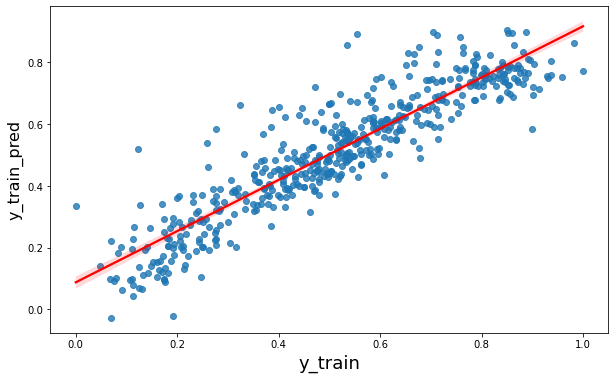

In [87]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_train, y=y_train_pred,line_kws={"color": "red"})
#plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)              
plt.xlabel('y_train', fontsize = 18)                          
plt.ylabel('y_train_pred', fontsize = 16) 
plt.show()

##### Observation :  The y_train and y_pred have a strong linear relationship

### 9.5 No multicollinearity between independent variables

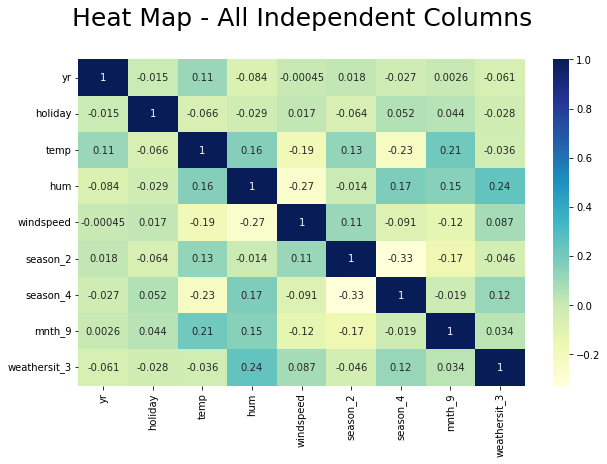

In [135]:
X_train_new1 = X_train_new.drop(["const"], axis = 1)
plt.figure(figsize = (10, 6))
sns.heatmap(X_train_new1.corr(),cmap="YlGnBu",annot=True)
plt.title("Heat Map - All Independent Columns\n",fontsize=25)#The title of the plot
plt.show()

In [137]:
vif# VIF value of the final features

,Features,VIF
0,const,40.20
4,hum,1.25
7,season_4,1.24
3,temp,1.21
6,season_2,1.19
5,windspeed,1.16
8,mnth_9,1.11
9,weathersit_3,1.11
1,yr,1.02
2,holiday,1.01


##### Observation :  
- From the above graph we can clearly see that all the input variables are independent of each other.
- From the VIF value we clearly can see that all the variables have VIF less than 5.
- Thus there is  **no multicolliearity** between the indipendent variables

## 10. Prediction and Evaluation on the Test Data

#### Now we we do the evaulution of the model on the Test Data using the folloing steps ,
1. Perform transform on the test data
2. Create X_test and y_test
3. Add constant to the X_test
4. List out the final variables got in train data
5. Predict the Model
6. Evaluate the Model using R-square value

### 10.1 Perform transform on the test data
- First we will perform **transform** on the test data.
- Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data.
- Thus, the parameters learned by our model using the training data will help us to transform our test data
- **Note** : If we perform fit_transform on test data it will lead to **data leakage from train to test data**

In [72]:
#List the continous variables in which we need to perform transform
test_con = ['atemp', 'hum','temp','windspeed','cnt']
#Applying transform the Continous columns of test data
df_test[test_con] = Scaler.transform(df_test[test_con])

In [73]:
#Verifying the test Data
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831662,0.769756,0.657358,0.084376,0.692706,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901246,0.842741,0.610161,0.153994,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.512002,0.496193,0.837696,0.334296,0.303382,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881495,0.795484,0.437139,0.339750,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817381,0.741664,0.314303,0.537376,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [74]:
#Verifying the test Data in terms of percentile
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558748,0.532961,0.638234,0.313393,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233160,0.217401,0.148698,0.159547,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046794,0.025991,0.261954,-0.042669,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355363,0.344907,0.529189,0.198909,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558189,0.544762,0.625618,0.300289,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756077,0.713376,0.743843,0.402952,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984503,0.981097,1.002164,0.807507,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 10.2 Create X_test and y_test

In [75]:
#Define X_test and y_test
y_test = df_test.pop('cnt') #This contains only the Target Variable
X_test = df_test #This contains all the Independent Variables except the Target Variable
#Since 'cnt' is the target variable we will keep it only on y-train and remove it from X_train

In [76]:
#Verifying the variables in X_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    uint8  
 8   season_3      220 non-null    uint8  
 9   season_4      220 non-null    uint8  
 10  mnth_2        220 non-null    uint8  
 11  mnth_3        220 non-null    uint8  
 12  mnth_4        220 non-null    uint8  
 13  mnth_5        220 non-null    uint8  
 14  mnth_6        220 non-null    uint8  
 15  mnth_7        220 non-null    uint8  
 16  mnth_8        220 non-null    uint8  
 17  mnth_9        220 non-null    uint8  
 18  mnth_10       220 non-null  

In [77]:
#Verifying the variables in y_test
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 220 entries, 184 to 653
Series name: cnt
Non-Null Count  Dtype  
--------------  -----  
220 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


### 10.3 Add constant to the X_test

In [78]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,1.0,0,1,0,0.831662,0.769756,0.657358,0.084376,0,1,...,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901246,0.842741,0.610161,0.153994,1,0,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.512002,0.496193,0.837696,0.334296,0,0,...,0,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.881495,0.795484,0.437139,0.339750,0,1,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.817381,0.741664,0.314303,0.537376,1,0,...,0,0,0,0,0,1,0,0,0,0


### 10.4 List out the final variables got in train data

In [79]:
#Keeping only the variables of the final train model
col_train = X_train_lm7.columns
col_train

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_4', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [80]:
X_test_sm=X_test_sm[col_train]
X_test_sm.head()

,const,yr,holiday,temp,hum,windspeed,season_2,season_4,mnth_9,weathersit_3
184,1.0,0,1,0.831662,0.657358,0.084376,0,0,0,0
535,1.0,1,0,0.901246,0.610161,0.153994,1,0,0,0
299,1.0,0,0,0.512002,0.837696,0.334296,0,1,0,0
221,1.0,0,0,0.881495,0.437139,0.339750,0,0,0,0
152,1.0,0,0,0.817381,0.314303,0.537376,1,0,0,0


### 10.5 Predict the Model

In [81]:
#apply the prediction using the lr of final train model
y_test_pred = lr7.predict(X_test_sm)

### 10.6 Evaluate the Model (R-Squared value Test)

In [82]:
r2=r2_score(y_test, y_test_pred)
r2

0.8035790321455116

In [83]:
#Calculating the Adjusted R-square of the test data
n = X_test_sm.shape[0]
p = X_test_sm.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7941808997122826

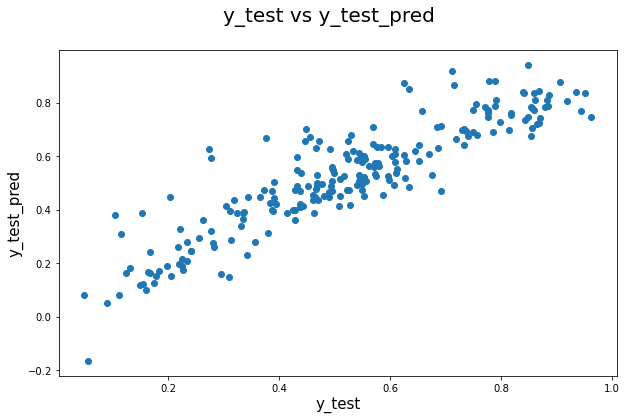

In [84]:
#Strong Linear relationship between y_test and y_test_pred
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_test_pred', fontsize = 15) 
plt.show()

### Observation : 
- The R-Square value of the Test Data is **0.80** which means 80% of the variation in the output variable is explained by the input variables.
- The Adjusted R-Square value of the Test Data is **0.79** which means 79% of variation is explained by only the independent variables that actually affect the dependent variable.
- The R-Square value of the Train Data set was **0.830**
- The Adjusted R-Square value of the Train Data set was  **0.827**
- Thus we can say this is a Perfectly Fit Model where the independent variables perfectly predicts the demand for shared bikes.

## 11. Conclusion

### The Final Multiple Linear Regression Equation is :

cnt = 0.27 + (0.22 x yr) - (0.09 x holiday) + (0.60 x temp) - (0.28 x hum) - (0.20 x windspeed) + (0.09 x season_2) + (0.14 x season_4) + (0.1 x mnth_9) - (0.19 x weathersit_3)

### The Predicted variables are :

1. yr (year)
2. holiday
3. temp (temperature)
4. hum (humidity)
5. windspeed
6. season_2 (summer season)
7. season_4 (winter_season)
8. mnth_9 (September Month)
9. weathersit_3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)

### The top 5 predictor variables which majorly affect the bike bookings are :

1. **temp** - A unit increase in temperature variable **increases** the bike bookings by 0.60 units.
2. **hum** -  A unit increase in humidity variable **decreases** the bike bookings by 0.28 units.
3. **yr** - A unit increase in year variable **increases** the bike bookings by 0.22 units.
4. **windspeed** - A unit increase in windspeed variable **decreases** the bike bookings by 0.20 units.
5. **weathersit_3** - A unit increase in weathersit_3 variable **decreases** the bike bookings by 0.20 units.

### Suggestions to the Business :

1. Boom Bikes should try to reach out to maximum customers during `summer` and `winter` seasons especially in the month `September`.
2. The company can give some attractive offers during `high humidity`, `high windspeed` and `little bad weather` as during this time there is a fall in customers.
3. The company can also give some attractive offers during `holiday` as there is a fall in customers in holidays.
4. The company can also expect an increase in customers in `year` on year basis.